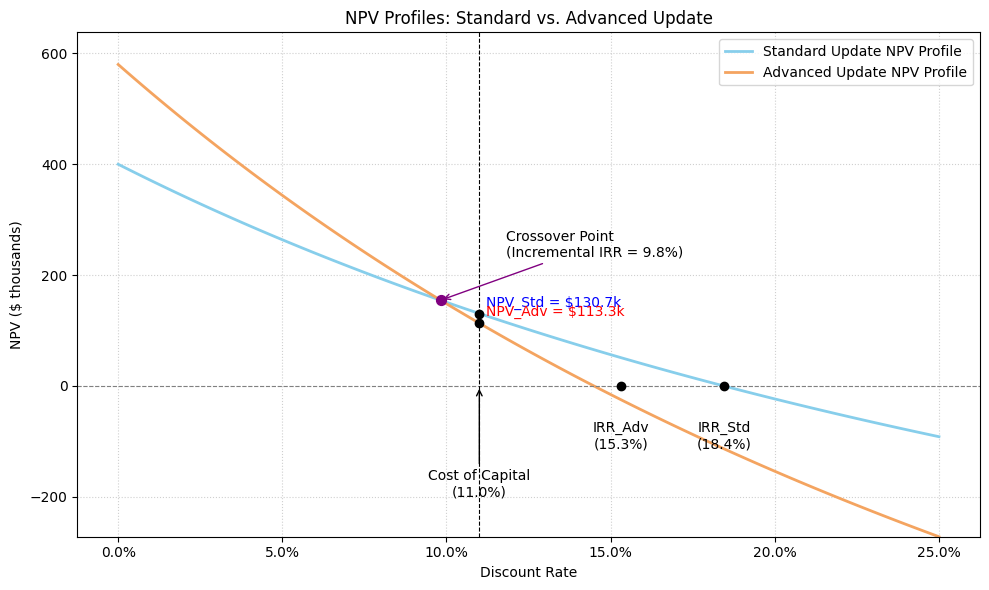

: 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# --- Project Cash Flows (in thousands of dollars) ---
cf_standard = np.array([-800, 300, 300, 300, 300])
cf_advanced = np.array([-1500, 520, 520, 520, 520])
cf_incremental = cf_advanced - cf_standard # [-700, 220, 220, 220, 220]

# --- Parameters ---
cost_of_capital = 0.11

# --- Calculate IRR values (using numpy_financial or pre-calculated values) ---
irr_standard = 0.1845 # Approx. 18.45%
irr_advanced = 0.1531 # Approx. 15.31%
irr_incremental = 0.0982 # Approx. 9.82% (This is the crossover rate)

# --- NPV Calculation Function ---
# Assumes cashflows[0] is the initial investment (usually negative)
def calculate_npv(rate, cashflows):
    npv = 0.0
    for t in range(len(cashflows)):
        npv += cashflows[t] / ((1 + rate) ** t)
    return npv

# --- Generate Discount Rates for Plotting ---
# Create a range of rates from 0% up to a reasonable upper bound (e.g., 25%)
discount_rates = np.linspace(0, 0.25, 100) # 100 points between 0 and 25%

# --- Calculate NPVs for each project over the range of rates ---
npv_standard = [calculate_npv(r, cf_standard) for r in discount_rates]
npv_advanced = [calculate_npv(r, cf_advanced) for r in discount_rates]

# --- Calculate NPV at specific points for plotting markers ---
npv_standard_at_coc = calculate_npv(cost_of_capital, cf_standard)
npv_advanced_at_coc = calculate_npv(cost_of_capital, cf_advanced)
npv_at_crossover = calculate_npv(irr_incremental, cf_standard) # NPVs are equal here

# --- Plotting ---
plt.figure(figsize=(10, 6))

# Plot NPV profiles
plt.plot(discount_rates, npv_standard, label='Standard Update NPV Profile', color='skyblue', linewidth=2)
plt.plot(discount_rates, npv_advanced, label='Advanced Update NPV Profile', color='sandybrown', linewidth=2)

# Add horizontal line at NPV = 0
plt.axhline(0, color='grey', linestyle='--', linewidth=0.8)

# Mark and Annotate Cost of Capital
plt.axvline(cost_of_capital, color='black', linestyle='--', linewidth=0.8)
plt.scatter([cost_of_capital, cost_of_capital], [npv_standard_at_coc, npv_advanced_at_coc], color='black', zorder=5)
plt.annotate(f'Cost of Capital\n({cost_of_capital:.1%})',
             xy=(cost_of_capital, 0), xycoords='data',
             xytext=(cost_of_capital, -150), textcoords='data', # Adjust y offset as needed
             arrowprops=dict(arrowstyle="->", color='black'),
             horizontalalignment='center', verticalalignment='top')
plt.annotate(f'NPV_Std = ${npv_standard_at_coc:.1f}k', xy=(cost_of_capital, npv_standard_at_coc), xytext=(5,5), textcoords='offset points', color='blue')
plt.annotate(f'NPV_Adv = ${npv_advanced_at_coc:.1f}k', xy=(cost_of_capital, npv_advanced_at_coc), xytext=(5,5), textcoords='offset points', color='red')


# Mark and Annotate IRRs (where NPV=0)
plt.scatter([irr_standard, irr_advanced], [0, 0], color='black', zorder=5)
plt.annotate(f'IRR_Std\n({irr_standard:.1%})', xy=(irr_standard, 0), xytext=(0,-25), textcoords='offset points', ha='center', va='top')
plt.annotate(f'IRR_Adv\n({irr_advanced:.1%})', xy=(irr_advanced, 0), xytext=(0,-25), textcoords='offset points', ha='center', va='top')

# Mark and Annotate Crossover Point (Incremental IRR)
plt.scatter(irr_incremental, npv_at_crossover, color='purple', zorder=5, s=50) # Mark intersection
plt.annotate(f'Crossover Point\n(Incremental IRR = {irr_incremental:.1%})',
             xy=(irr_incremental, npv_at_crossover), xycoords='data',
             xytext=(irr_incremental + 0.02, npv_at_crossover + 100), textcoords='data', # Adjust text offset
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3", color='purple'),
             horizontalalignment='left', verticalalignment='center')

# --- Formatting ---
plt.xlabel("Discount Rate")
plt.ylabel("NPV ($ thousands)")
plt.title("NPV Profiles: Standard vs. Advanced Update")
plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0)) # Format x-axis as percentage
plt.legend()
plt.grid(True, linestyle=':', alpha=0.6)
plt.ylim(min(np.min(npv_standard), np.min(npv_advanced), -200), # Adjust y-limits if needed
         max(np.max(npv_standard), np.max(npv_advanced)) * 1.1)
plt.tight_layout() # Adjust layout to prevent labels overlapping

# --- Show Plot ---
plt.show()